# Analyse de données de films

Nous proposons de travailler sur des données décrivant des films. Les possibilités sont larges et vous êtes évalués sur vos propositions et votre méthodologie plus que sur vos résultats.

Les données de départ sont disponibles sur:
https://grouplens.org/datasets/movielens/
au format CSV. 

Nous nous intéresserons en particulier au jeu de données: **MovieLens 20M Dataset**. Dans ce jeu de données, vous disposez entre autre de:
* Idendifiant du film dans IMdb et TMdb (ça sera important ensuite)
* Catégorie(s) du film
* Titre du film
* Notes données par les internautes aux films

Afin de rendre le projet plus intéressant, nous ajoutons des données sur les acteurs et producteurs associés aux films (récupéré sur TMdb). Ces données sont disponibles sur les liens suivants:

http://webia.lip6.fr/~guigue/film_v2.pkl <br>
http://webia.lip6.fr/~guigue/act_v2.pkl <br>
http://webia.lip6.fr/~guigue/crew_v2.pkl

Ces fichiers contiennent respectivement : une nouvelle description des films (dont l'identifiant TMdb et la note moyenne donnée par les internautes, la date de sortie,...), une description des acteurs de chaque film et une description des équipes (scénariste, producteur, metteur en scène) pour chaque film.

Ces données sont des listes de taille 26908, chaque élément de la liste correspondant à un dictionnaire dont vous étudierez les clés pour récupérer les informations utiles.

**ATTENTION** Les contraintes de récupération d'informations en ligne font que la base MovieLens compte 27278 films mais les fichiers ci-dessus n'en comptent que 26908. Le plus simple est probablement d'éliminer les films de MovieLens qui ne sont pas dans cette seconde base.

## Consignes générales pour l'analyse des données

Vous devez proposer plusieurs analyses des données, qui devront à minima utiliser les
 techniques suivantes:
 
1. Mettre en forme les données pour identifier les acteurs et les catégories, les indexer
1. Traiter au moins un problème de régression supervisé (par exemple la prédiction de la note moyenne donnée à un film par les internautes).
1. Traiter au moins un problème de classification supervisé (par exemple la prédiction de la catégorie d'un film)
1. Utiliser les données catégorielles (catégories, acteurs,...) de manière discrète ET de manière coninue (*dummy coding*) dans des approches différentes
1. Proposer au moins une approche de catégorisation non supervisée (pour regrouper les acteurs par exemple)
1. Mener une campagne d'expérience permettant de comparer les performances sur un problème en fonction des valeurs d'un paramètre (et donc, in fine, trouver la meilleure valeur du paramètre)
1. Proposer quelques illustrations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle as pkl
import sys
import math
sys.path.append('../')
import iads as iads
from iads import LabeledSet as ls
from iads import Classifiers as cl
from iads import util_iads as ui
from iads import utils as ut
from iads import engineering as en
from iads import kmoyennes as km
from iads import cluster as ct
from iads import multiclasses as cm

## Chargement des données (base MovieLens + enrichissements)

In [2]:
# Chargement des données MovieLens
#movies = pd.read_csv("data/ml-20m/movies.csv", encoding='utf8')
movies = pd.read_csv("data/ml-20m/moviesFiltree.csv", encoding='utf8', index_col=0)
links = pd.read_csv("data/ml-20m/links.csv", encoding='utf8')
ratings = pd.read_csv("data/ml-20m/ratings.csv", encoding='utf8')
tags = pd.read_csv("data/ml-20m/tags.csv", encoding='utf8')
genomeS = pd.read_csv("data/ml-20m/genome-scores.csv", encoding='utf8')
genomeT = pd.read_csv("data/ml-20m/genome-tags.csv", encoding='utf8')

In [3]:
# Chargement des données complémentaires
acteurs = pkl.load(open("data/act_v2.pkl", "rb"))
equipes = pkl.load(open("data/crew_v2.pkl", "rb"))
films = pkl.load(open("data/film_v2.pkl", "rb"))

<h2>Filtrage des données</h2>

In [4]:
"""
print("BEFORE")
print(len(movies))
#print(len(films))
moviesFilter = []
filmId = []
cpt = 0
for i in range(len(films)):
    filmId.append(films[i]["id"])
    
for i in range(len(movies)):
    line = links.loc[links['movieId'] == movies.iloc[i]["movieId"]]
    value = float(line.iloc[0]["tmdbId"])
    if(math.isnan(value)):
        cpt += 1
        continue
    if(value in filmId):
        moviesFilter.append(movies.iloc[i]["movieId"])
    else:
        cpt += 1
movies = movies[movies.movieId.isin(moviesFilter)]
links = links[links.movieId.isin(moviesFilter)]
ratings = ratings[ratings.movieId.isin(moviesFilter)]
print("\nAFTER")
print(len(movies))
movies.to_csv("data/ml-20m/moviesFiltree.csv", encoding='utf8')
"""

'\nprint("BEFORE")\nprint(len(movies))\n#print(len(films))\nmoviesFilter = []\nfilmId = []\ncpt = 0\nfor i in range(len(films)):\n    filmId.append(films[i]["id"])\n    \nfor i in range(len(movies)):\n    line = links.loc[links[\'movieId\'] == movies.iloc[i]["movieId"]]\n    value = float(line.iloc[0]["tmdbId"])\n    if(math.isnan(value)):\n        cpt += 1\n        continue\n    if(value in filmId):\n        moviesFilter.append(movies.iloc[i]["movieId"])\n    else:\n        cpt += 1\nmovies = movies[movies.movieId.isin(moviesFilter)]\nlinks = links[links.movieId.isin(moviesFilter)]\nratings = ratings[ratings.movieId.isin(moviesFilter)]\nprint("\nAFTER")\nprint(len(movies))\nmovies.to_csv("data/ml-20m/moviesFiltree.csv", encoding=\'utf8\')\n'

<h2>Visionnage des données</h2>

In [5]:
#links
#ratings
#tags
#genomeS
#genomeT
#movies
#films[9]
#acteurs[0]
#equipes[0][194]

## Feature engineering
A vous de créer les caractéristiques de description des données qui permettront d'améliorer les performances dans les tâches que vous aurez choisi d'aborder dans le projet.

In [6]:
# Faire un dictionnaire avec tous les acteurs (acteur => indice)
# + un dictionnaire inversé (indice => acteur)
ue = en.UtilsEngineering(films, acteurs)
print("Tom Hanks à joué dans", ue.actorsPlayedMovies["Tom Hanks"]["Total"], "films")
print("Tom Hanks à joué dans", ue.actorsPlayedMovies["Tom Hanks"]["Comedy"], "comédies")

UtilsEngineering init in process
UtilsEngineering init successful
Tom Hanks à joué dans 57 films
Tom Hanks à joué dans 33 comédies


# Présentation du traitement
<strong><font color="blue">[P]</font></strong> = Protocole<br/>
<strong><font color="green">[Q]</font></strong> = Question<br/>
<strong><font color="green">[A]</font></strong> = Réponse<br/>
<strong><font color="orange">[E]</font></strong> = Exploitation des données<br/>
<strong><font color="purple">[R]</font></strong> = Approfondissement<br/>
<strong><font color="red">[C]</font></strong> = Critique<br/>
## Mise en situation
Notre entreprise de traitement de données nommée <strong>Kerneloud</strong> veut se faire un nom dans le milieu de la data science afin d'attirer les VC's de la sillicon valley à Paris.
Pour cela Kerneloud va viser le secteur du divertissement multimédia pour faire ses preuves.<br/>

<strong><font color="green">[Q]</font></strong> Pourquoi le milieu du divertissement ?<br/>
<strong><font color="green">[A]</font></strong> Le budget ne permet que de se constituer d'une base de donnée..

## Genres predictions
Pour commencer Kerneloud veut publier un article afin de predire si une categorie sera rentable à partir des données des anciens films récoltés<br/>

<strong><font color="blue">[P]</font></strong> Faire un dataframe sur les categories, leur quantites de films et leur engagements puis le tester sur des classifiers afin de prédire la note moyenne des films de la categorie

<strong><font color="green">[Q]</font></strong> A partir de quoi est défini une bonne catégorie ?<br/>
<strong><font color="green">[A]</font></strong> La médianne de la note moyenne d'une catégorie sert de temoin pour définir une bonne catégorie

<strong><font color="green">[Q]</font></strong> Pourquoi la médianne à été choisie ?<br/>
<strong><font color="green">[A]</font></strong> Cela permet d'équilibrer les données vu le peu de catégories pouvant etre utilisé (le budget..)

In [7]:
#ge = en.GenresEngineering(movies,(links, films))
#df = ge.toDataFrame()
#df.to_csv("data/engineering/genres.csv", encoding='utf8')
df = pd.read_csv("data/engineering/genres.csv", encoding='utf8', index_col=0)
df

,quantite,engagement,target
Adventure,0.160587,0.653805,-1
Animation,0.061394,0.234012,1
Children,0.072183,0.259724,-1
Comedy,0.625427,0.784191,-1
Fantasy,0.091354,0.347602,-1
Romance,0.299752,0.376248,-1
Drama,1.000000,1.000000,1
Action,0.253648,0.841496,-1
Crime,0.209329,0.394125,1
Thriller,0.305107,0.692253,-1


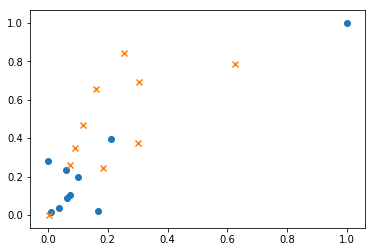

In [8]:
une_base = ls.LabeledSet(2)
for i in range(len(df)):
    une_base.addExample([df.iloc[i]['quantite'], df.iloc[i]['engagement']], df.iloc[i]['target'])
ut.plot2DSet(une_base)

No handles with labels found to put in legend.


Mean accuracy 63.74999999999998
Variance accuracy 179.6875


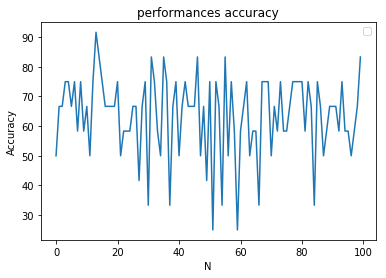

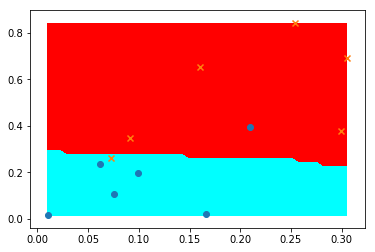

(63.74999999999998, 179.6875)

In [9]:
#ut.affiche_base(une_base)
knn = cl.ClassifierKNN(une_base.getInputDimension(), 3)
ut.super_entrainement(100, une_base, knn, 40)

<strong><font color="orange">[E]</font></strong> On obtient un classifier avec une précision un peu près abordable. Cela est en parti du au fait qu'on préfère s'entrainer sur une minorité de données. Vu la disposition des données ici qui sont entrelacées et non démarquées par une frontiere, le Knn semble être un bon choix.
On peut donc prédire quand une catégorie ou une de ses sous categories de film sera rentable grace à sa quantité de films et l'engagement que les utilisateurs lui ont accordé. 

<strong><font color="red">[C]</font></strong> Il y a tres peu de données ici, il faudrait plus de catégories et de sous categories pour que le travail soit efficace. De plus le plus gros du travail s'effectue dans la création du dataframe, cela est donc très couteux en temps. Le problème traité ici pourrait etre résolu avec de la programmation linéaire. Enfin il y a peut être une corrélation entre l'engagement des utilisateurs et la note obtenue, il faudrait donc choisir d'autres arguments pour départager les différentes catégories

<strong><font color="purple">[R]</font></strong> On pourrait rajouter des dimensions afin de mieux départager les catégories et ainsi gagner en précision. On pourrait entrainer d'autres classifiers et prendre celui avec la meilleure précision.

## Movies prediction
Le premier article publié par les docteurs de <strong>kerneloud</strong> à eu un succès régional de par sa simplicité à traiter et vulgariser un problème et cela leur à permis d'avoir des financements de la part des investisseurs de <strong>station E</strong>.<br/>
Des investisseurs et producteurs venus de Cannes voudraient exporter le cinéma français à l'international et pour cela ils voudraient les ingrédients pour avoir un bon film.
    
<strong><font color="blue">[P]</font></strong> Faire un dataFrame sur les films, leur genre, le nombre de votes qu'ils ont reçuent, leur langue originale, la note moyenne des films dans lesquels les acteurs principaux ont joués et leur popularité afin de prédire leur note

In [10]:
me = en.MoviesEngineering(films, (ue.plays, ue.actorsMeanMovies, ue.languages))
df = me.toDataFrame("mean")
df

MoviesEngineering init in process
MoviesEngineering init successful
stack original_language
mean 6.105678608592241


,vote_count,mean_main_actors,popularity,original_language,target
Toy Story,0.453466,0.653343,0.428418,en,1
Jumanji,0.265622,0.652299,0.055441,en,1
Grumpier Old Men,0.006648,0.633164,0.114305,en,1
Waiting to Exhale,0.002612,0.604392,0.054876,en,-1
Father of the Bride Part II,0.013675,0.605705,0.128245,en,-1
Heat,0.142545,0.333967,0.257092,en,1
Sabrina,0.012346,0.688355,0.116205,en,-1
Tom and Huck,0.003466,0.582065,0.067104,en,-1
Sudden Death,0.013248,0.598221,0.110806,en,-1
GoldenEye,0.087987,0.620224,0.312834,en,1


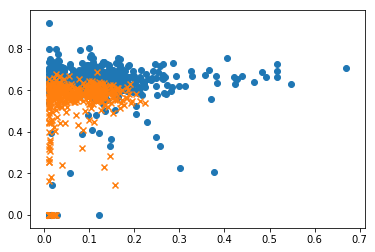

In [11]:
lsNote = ls.LabeledSet(2)
for i in range(1000):
    lsNote.addExample([df.iloc[i]['popularity'], df.iloc[i]['mean_main_actors']], df.iloc[i]['target'])
ut.plot2DSet(lsNote)

No handles with labels found to put in legend.


Mean accuracy 78.98142857142857
Variance accuracy 20.036976530612243


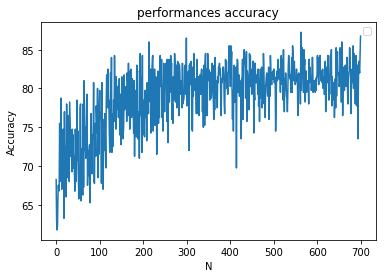

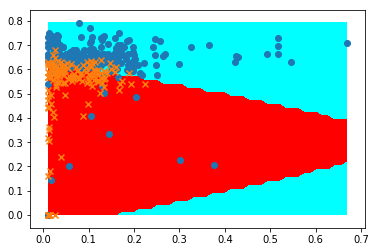

(78.98142857142857, 20.036976530612243)

In [12]:
kernel = cl.KernelPoly()
gradient = cl.ClassifierGradientStochastiqueKernel(6, 0.01, kernel)
ut.super_entrainement(700, lsNote, gradient, 60)

No handles with labels found to put in legend.


Mean accuracy 63.25928571428572
Variance accuracy 28.530449489795917


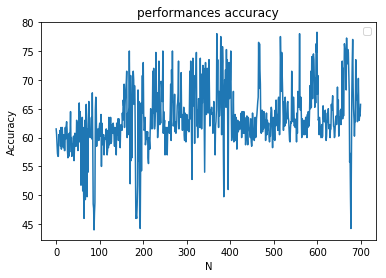

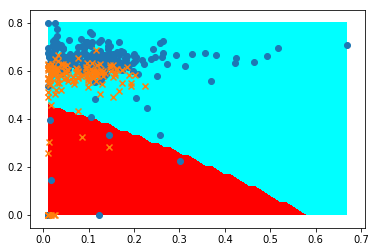

(63.25928571428572, 28.530449489795917)

In [13]:
kernel = cl.KernelPoly()
gradient = cl.ClassifierGradientBatchKernel(6, 0.045, kernel)
ut.super_entrainement(700, lsNote, gradient, 60)

## Genres Cluster
La dernière collaboration des chercheurs de <strong>Kerneloud</strong> leur à permis de se faire connaître à l'interational et de recevoir des financements d'investisseurs d'un peu partout dans le monde. Tous ce travail à permis d'attirer une entreprise de Neverllywood, <strong>Werner Bros</strong>. La compagnie <strong>WB</strong> peine à produire ses résultats trimestrielles et pour cela elle voudrait se relancer en produisant un film qui touche la plus large gamme de public possible.

<strong><font color="blue">[P]</font></strong> Faire un dataFrame sur les genres et les films qui y sont pour déterminer les genres similaires grâce aux centroides du cluster

In [14]:
gce = en.GenresClusterEngineering(films)
df = gce.toDataFrame(cluster=True)
df

GenreClusterEngineering init in process
GenreClusterEngineering init successful


,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
Toy Story,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Jumanji,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
Grumpier Old Men,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
Waiting to Exhale,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
Father of the Bride Part II,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Heat,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
Sabrina,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
Tom and Huck,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
Sudden Death,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
GoldenEye,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [15]:
"""
Fonction qui permet de visualiser les distances
entre 2 dimension d'un dataFrame
df: DataFrame, dataFrame à visionner
x: String, nom d'une colonne du dataFrame
y: String, nom d'une colonne du dataFrame
"""
def compareCentroide(df, x, y):
    dfBis = df[[x, y]][:1000]
    dfBis = dfBis.rename({x:"X", y:"Y"}, axis='columns')
    centroide, matrice = km.kmoyennes(3, dfBis, 0.005, 1000)
    km.affiche_resultat(dfBis,centroide,matrice)
    return centroide, matrice

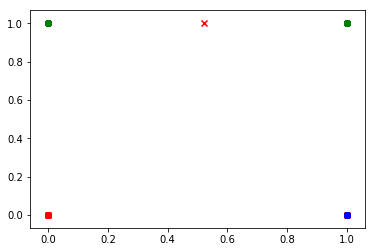

In [16]:
centroide2d, matrice2d = compareCentroide(df, "Action", "Adventure")
centroide, matrice = km.kmoyennes(20, df[:500], 0.05, 1000)

In [17]:
centroide2d = centroide2d.dropna()
centroide = centroide.dropna()

In [18]:
print(centroide2d)
#print(matrice2d)
print("\n_____________________________________________FROM__2D__TO__20D___________________________________________________\n")
print(centroide)
#print(matrice)

          X    Y
0  1.000000  0.0
1  0.522124  1.0
2  0.000000  0.0

_____________________________________________FROM__2D__TO__20D___________________________________________________

      Action  Adventure  Animation    Comedy     Crime  Documentary     Drama  \
0   0.026316   0.019737   0.013158  0.276316  0.138158          0.0  0.927632   
1   0.000000   0.000000   0.000000  1.000000  0.000000          0.0  1.000000   
2   0.032258   0.096774   0.064516  0.903226  0.032258          0.0  0.000000   
3   0.400000   0.050000   0.000000  0.100000  1.000000          0.0  0.650000   
4   0.018519   0.055556   0.000000  0.000000  0.055556          0.0  1.000000   
5   0.000000   0.000000   0.000000  0.000000  0.000000          0.0  0.600000   
6   1.000000   0.300000   0.000000  0.000000  0.000000          0.0  0.600000   
7   0.055556   0.000000   0.000000  0.055556  0.055556          0.0  0.055556   
8   0.000000   0.072727   0.018182  1.000000  0.163636          0.0  0.000000   
9   0.

In [19]:
M_Fusion = ct.clustering_hierarchique(centroide, "manhattan")
print('\nLa matrice M_Fusion obtenue :\n',M_Fusion)

Fusion de 4 et 1 pour une distance de 1.7867794486215538
Fusion de 16 et 2 pour une distance de 2.398689038905507
Fusion de 7 et 5 pour une distance de 2.671111111111111
Fusion de 6 et 3 pour une distance de 2.78625
Fusion de 19 et 11 pour une distance de 3.148125
Fusion de 17 et 0 pour une distance de 3.156877696189792
Fusion de 14 et 9 pour une distance de 3.208020050125313
Fusion de 22 et 21 pour une distance de 3.6230600051108715
Fusion de 20 et 12 pour une distance de 3.7693427863136097
Fusion de 23 et 8 pour une distance de 3.898206877364162
Fusion de 15 et 13 pour une distance de 4.1429149797570854
Fusion de 25 et 24 pour une distance de 4.3905775727182474
Fusion de 27 et 26 pour une distance de 4.150972758068785
Fusion de 28 et 18 pour une distance de 5.404296650112024
Fusion de 29 et 10 pour une distance de 5.4655109091781595

La matrice M_Fusion obtenue :
 [[ 4.          1.          1.78677945  2.        ]
 [16.          2.          2.39868904  2.        ]
 [ 7.          5.  

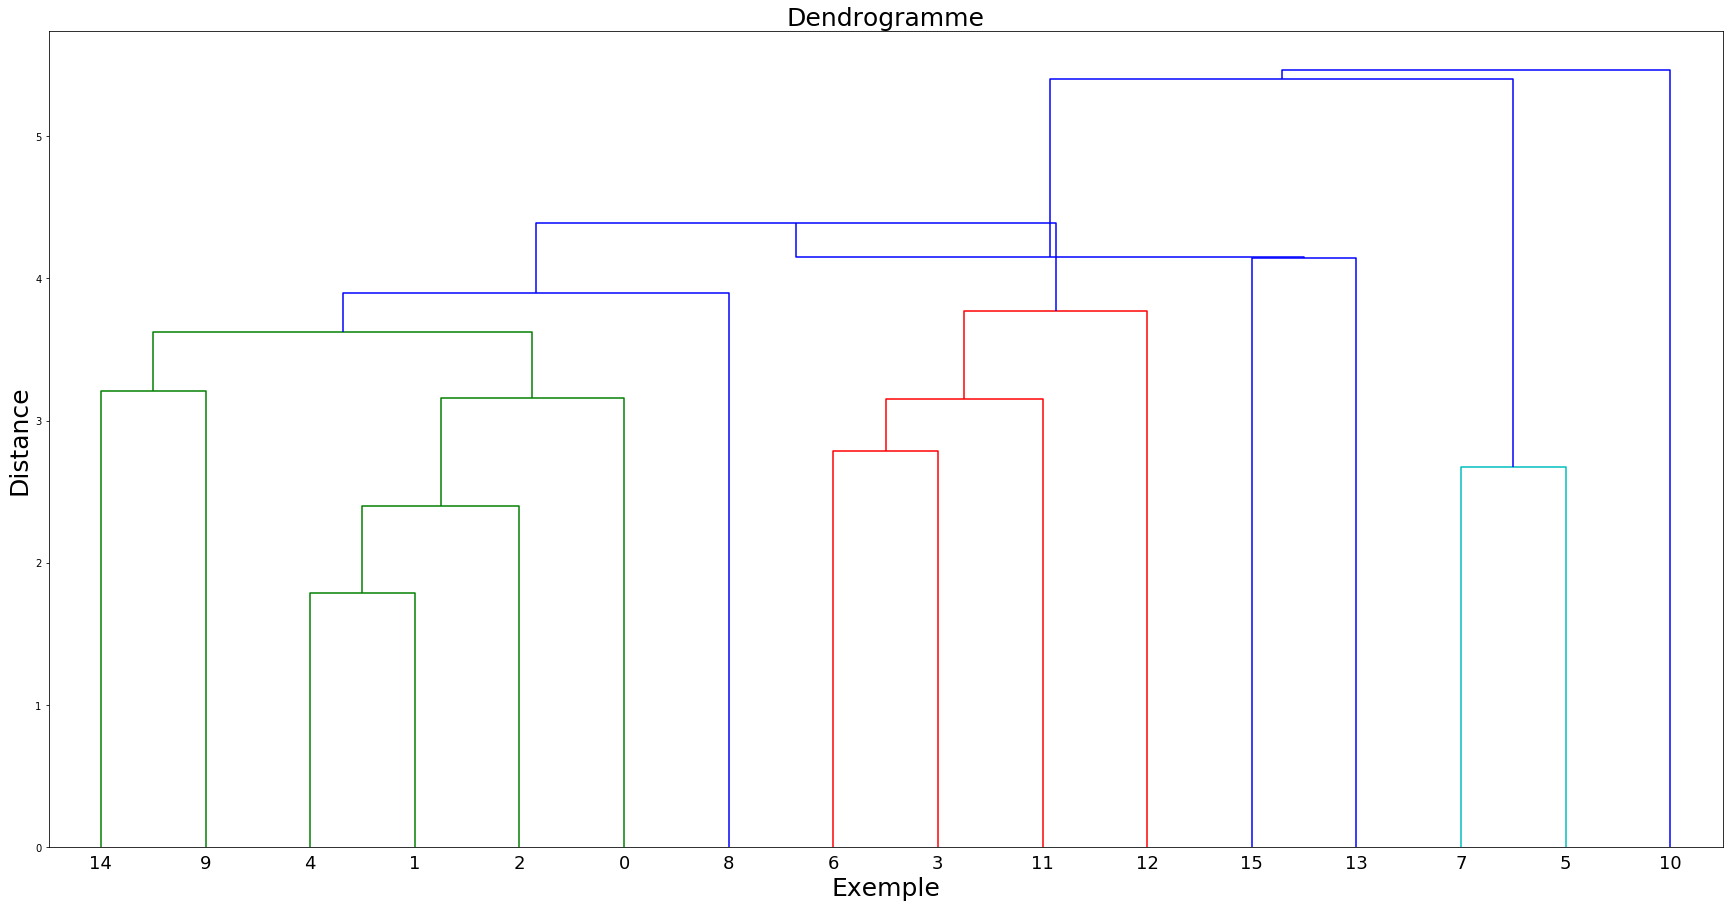

In [20]:
ct.dendogramme(M_Fusion)

In [21]:
"""
Fonction retournant le ou les categories correspondant
à chaque centroide
centroide: dataframe, contient les categories et leur distance par rapport au centroide
"""
def affinite(centroide):
    final = {}
    for i in range(len(centroide)):
        inter = []
        for k in list(centroide):
            if centroide.iloc[i][k] >= 1.0:
                inter.append(k)
        final[i] = inter
    return final

In [22]:
affinite(centroide)

{0: [],
 1: ['Comedy', 'Drama', 'Romance'],
 2: ['Romance'],
 3: ['Crime'],
 4: ['Drama', 'Romance'],
 5: ['Fantasy'],
 6: ['Action', 'Thriller'],
 7: [],
 8: ['Comedy'],
 9: ['Drama', 'Music'],
 10: [],
 11: ['Action', 'Romance', 'Thriller'],
 12: ['Adventure'],
 13: ['Action'],
 14: ['Documentary'],
 15: ['Action', 'Comedy', 'War']}

<strong><font color="orange">[E]</font></strong> Les clusters obtenus nous permettent d'observer les catégories qui ont la même affinité. Pondérer cela avec les distances obtenues lors du clustering hierarchique nous permet de trouver une ou deux catégories capables d'être en commun avec d'autres catégories ne dépassant pas un certain seuil d'incompatibilité.

<strong><font color="purple">[R]</font></strong> On pourrait filtrer les films de départ afin de ne conserver que ceux suceptible de nous intéresser. Par exemple pour produire un film de nos jours dont la catégorie est suceptible de toucher le plus de publique entre 30 et 40 ans dans le marché Est asiatique, il serait plus judicieux de ne conserver que les films qui ont eu un succèes dans cette région et datant d'après l'année 2000

<strong><font color="green">[Q]</font></strong> Pourquoi ne pas avoir automatisé l'approfondissement ?<br/>
<strong><font color="green">[A]</font></strong> Le budget..

## Genres prediction
Les docteurs de <strong>kerneloud</strong> connaissent désormais un succès international, ils sont sollicités par toutes les industries du multimedia du monde entier.<br/>
Toutefois, pour relancer la donne dans cette industrie, et qu'il n'y ait pas seulement de grosses multinationales, <strong>kerneloud</strong> offre ses services à une petite entreprise londonienne qui peine à faire ses débuts dans le cinéma. Cette toute récente startup britannique produit des films d'un genre nouveau, qui ne permettent à aucun de tomber d'accord sur le genre.<br/>
<strong>Kerneloud</strong> va s'associer cette firme pour leur permettre de régler ce problème. 
    
<strong><font color="blue">[P]</font></strong> Faire 20 dataFrames sur les films, le nombre de votes qu'ils ont reçuent, leur langue originale, la note moyenne des films dans lesquels les acteurs principaux ont joués et leur popularité. Chaque dataFrame aura la stratégie un contre tous.

In [23]:
ge = en.MoviesGenresEngineering(films, (ue.plays, ue.actorsMeanMovies, ue.languages))
genres = list(ue.genres.keys())
dfs = []
for genre in genres :
    dfs.append(ge.toDataFrame("vs", "genre_id", genre))
 

MoviesEngineering init in process
MoviesEngineering init successful
vs 28
vs 12
vs 16
vs 35
vs 80
vs 99
vs 18
vs 10751
vs 14
vs 36
vs 27
vs 10402
vs 9648
vs 10749
vs 878
vs 10770
vs 53
vs 10752
vs 37


In [24]:
bases = []
print("LabeledSet init in process")
for d in range(len(dfs)) :
    une_base = ls.LabeledSet(2)
    for i in range(1000):
        une_base.addExample([dfs[d].iloc[i]['note'], dfs[d].iloc[i]['mean_main_actors']], dfs[d].iloc[i]['target'])
    bases.append(une_base)
print("LabelSet init successfull")

LabeledSet init in process
LabelSet init successfull


Training init in process


No handles with labels found to put in legend.


Mean accuracy 86.08303571428571
Variance accuracy 362.3743997130102


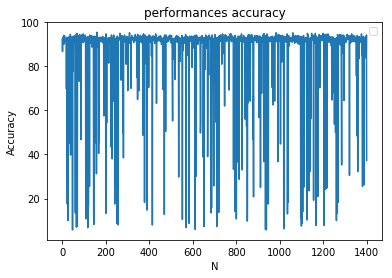

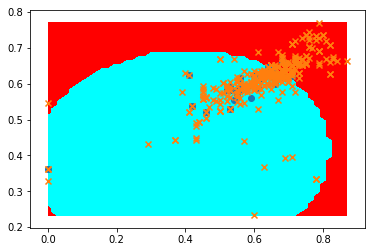

No handles with labels found to put in legend.


Mean accuracy 91.33946428571429
Variance accuracy 282.5115050701531


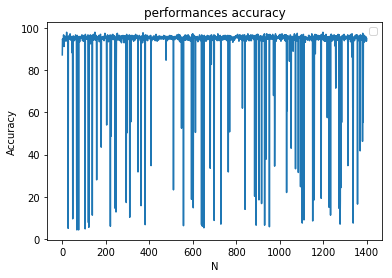

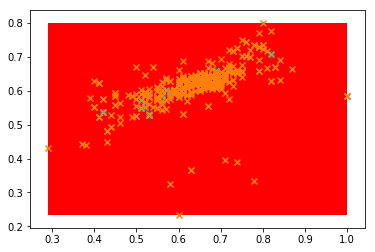

No handles with labels found to put in legend.


Mean accuracy 98.59017857142857
Variance accuracy 37.37378746811225


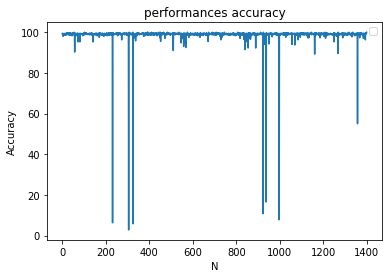

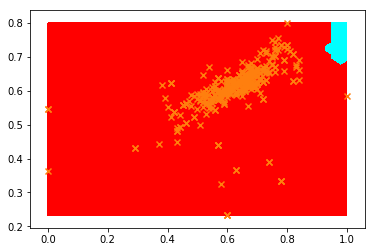

No handles with labels found to put in legend.


Mean accuracy 75.35482142857143
Variance accuracy 462.74727139668363


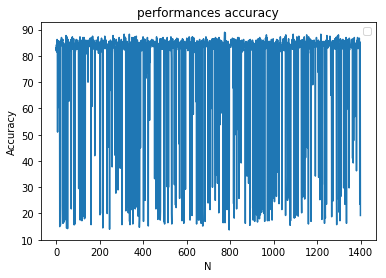

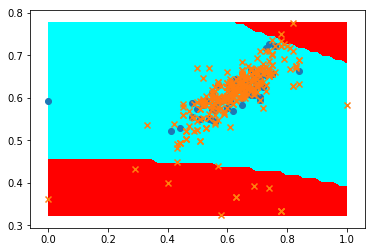

No handles with labels found to put in legend.


Mean accuracy 87.05553571428571
Variance accuracy 391.93374614158165


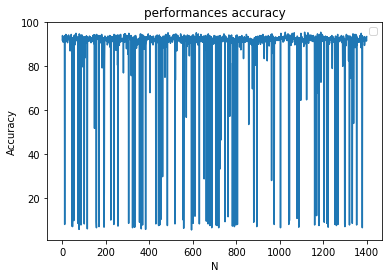

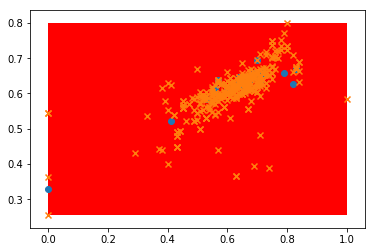

No handles with labels found to put in legend.


Mean accuracy 98.04053571428571
Variance accuracy 26.529026498724487


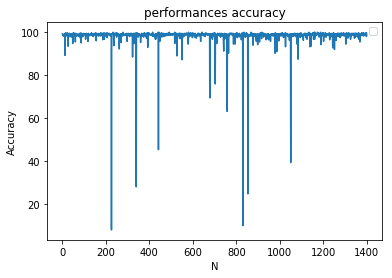

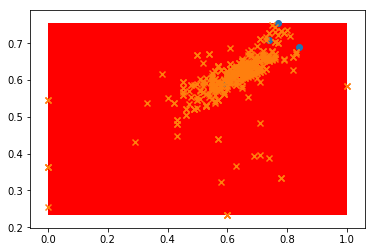

No handles with labels found to put in legend.


Mean accuracy 63.098571428571425
Variance accuracy 407.0788551020408


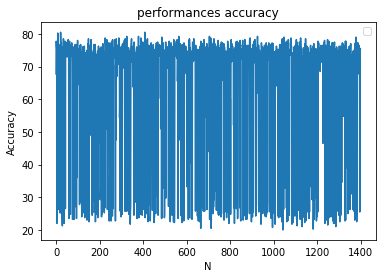

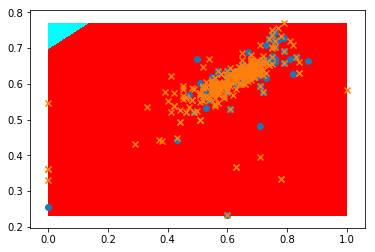

No handles with labels found to put in legend.


Mean accuracy 89.62160714285714
Variance accuracy 321.64472063137754


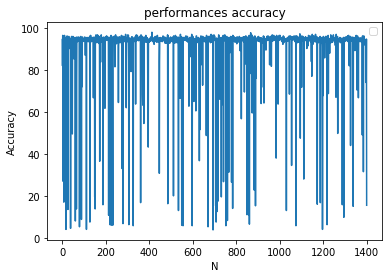

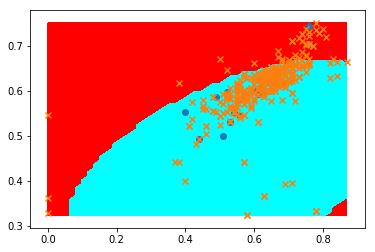

No handles with labels found to put in legend.


Mean accuracy 93.63660714285714
Variance accuracy 219.72432955994898


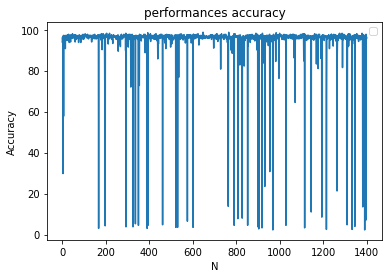

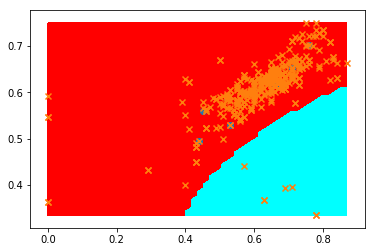

No handles with labels found to put in legend.


Mean accuracy 97.06482142857143
Variance accuracy 98.55414639668369


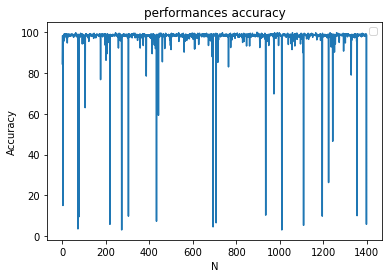

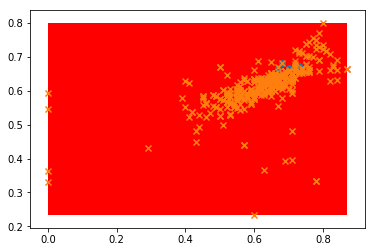

No handles with labels found to put in legend.


Mean accuracy 95.72410714285714
Variance accuracy 119.08883848852041


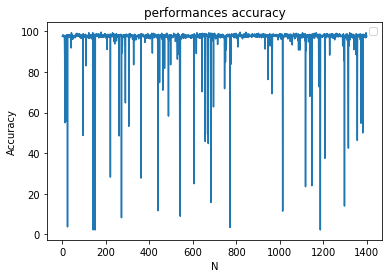

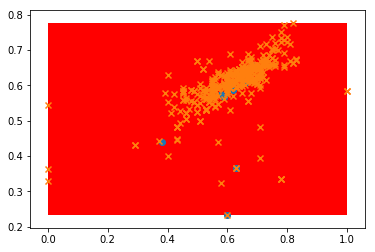

Mean accuracy 98.63982142857142
Variance accuracy 39.69719103954082


No handles with labels found to put in legend.


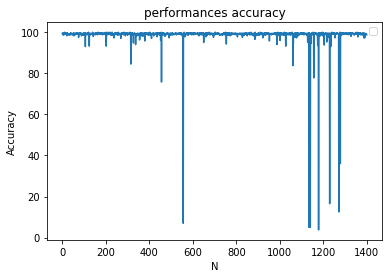

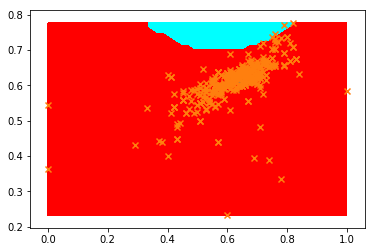

No handles with labels found to put in legend.


Mean accuracy 96.03142857142858
Variance accuracy 124.11481581632655


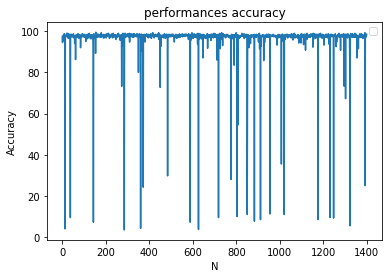

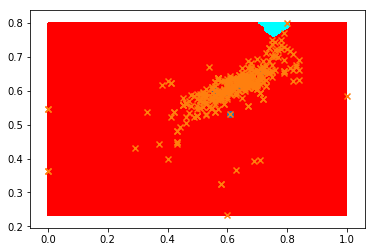

No handles with labels found to put in legend.


Mean accuracy 80.45428571428572
Variance accuracy 528.4393387755102


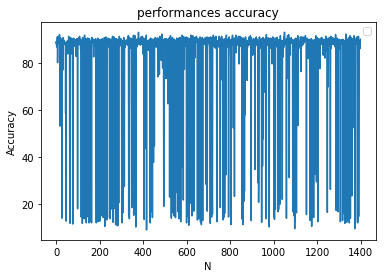

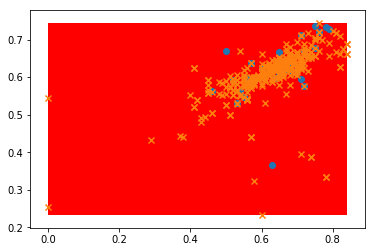

No handles with labels found to put in legend.


Mean accuracy 94.41732142857143
Variance accuracy 203.36186961096936


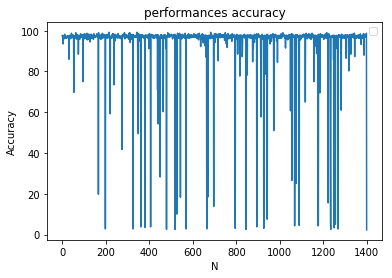

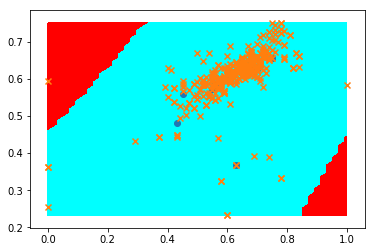

No handles with labels found to put in legend.


Mean accuracy 99.85267857142857
Variance accuracy 1.0354838966836737


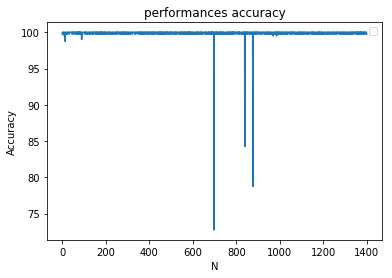

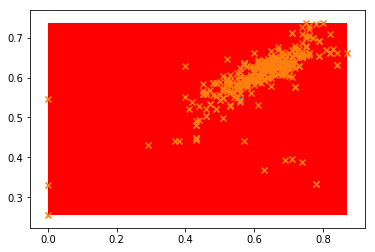

No handles with labels found to put in legend.


Mean accuracy 83.3475
Variance accuracy 482.05790446428574


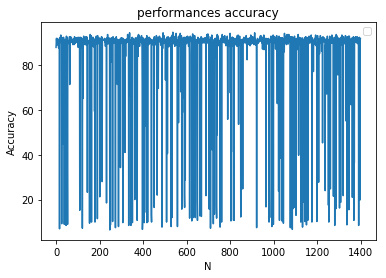

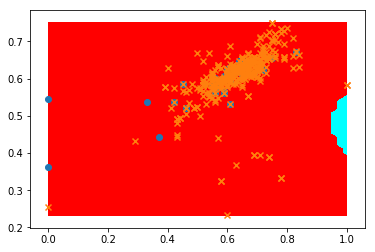

No handles with labels found to put in legend.


Mean accuracy 98.77535714285715
Variance accuracy 18.097482015306124


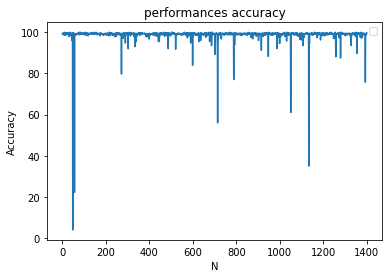

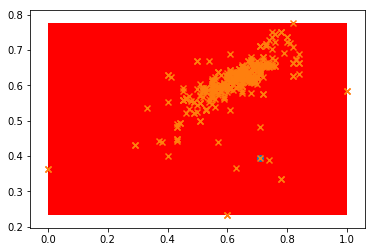

No handles with labels found to put in legend.


Mean accuracy 98.88303571428571
Variance accuracy 39.12038185586736


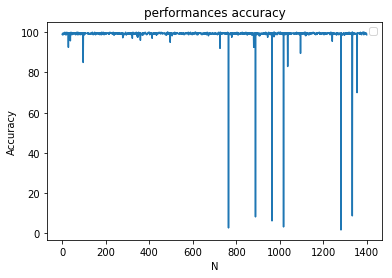

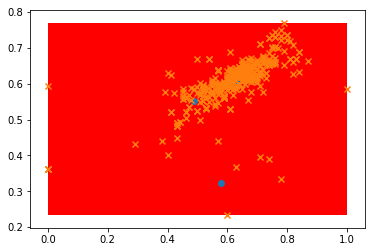

Training init successfull


In [25]:
listClassifiers = []
print("Training init in process")
for d in range(len(dfs)):
    k = cl.KernelPoly()
    cla= cl.ClassifierPerceptronKernel(6,0.05,k)
    print(ue.genres[genres[d]])
    mean, vari = ut.super_entrainement(1400, bases[d],cla, 60)
    listClassifiers.append(cla)
print("Training init successfull")

In [27]:
cmc = cm.ClassifierMultiClasses(dfs, bases, listClassifiers)